In [ ]:
import csv
import jieba
import os
import matplotlib.pyplot as plt
import pickle
import sentencepiece as spm


# 定义文件路径
script_dir = '/Users/Hana/Downloads/八斗学院/AiPremiumClass/吴方恩/week07-text-classifier'
input_file = os.path.join(script_dir, "data/DMSC-CUG King of Heroes.csv")

# 评论数
num_comments = 5000

with open(input_file, 'r', encoding='utf-8') as infile:
    reader = csv.DictReader(infile)
    # 收集评论和星级
    ds_comments = []
    for row in reader:
        vote = int(row['Star'])
        # 除去星际为3的，若星级为4或5则vote得分为1表示正面评价，否则为负面评价
        vote = 1 if vote > 3 else 0
        # 随机获取数据集中5k条正面评价和5k条负面评价的数据
        if vote == 1 and len([c for c, v in ds_comments if v == 1]) < num_comments:
            words = jieba.lcut(row['Comment'])
            ds_comments.append((words, vote))
        elif vote == 0 and len([c for c, v in ds_comments if v == 0]) < num_comments:
            words = jieba.lcut(row['Comment'])
            ds_comments.append((words, vote))   
        # 当正面评价和负面评价都达到5k条时，停止收集
        if len([c for c, v in ds_comments if v == 1]) >= num_comments and len([c for c, v in ds_comments if v == 0]) >= num_comments:
            break
print(ds_comments[:2])
print(len(ds_comments))

[([' ', '有人', '说', '挺', '《', '小', '时代', '》', '的', '人', '都', '将', '在', '电影史', '耻辱柱', '上', '有', '一席之地', '。', '那么', '给', '《', '大圣', '归来', '》', '的', '打', '一星', '的', '人', '也', '是', '如此', '！', '此片', '真', '称不上', '什么', '神作', '，', '但', '打', '一星', '的', '人', '心理', '够', '阴暗', '啊', '，', '天天', '喷', '国产片', '垃圾', '，', '出', '了', '一部', '质量', '尚可', '的', '却', '跑', '来', '打压', '，', '从', '垃圾', '跃进', '到', '好莱坞', '靠', '嘴', '喷', '即可', '？', '若', '喷', '最狠', '的', '人', '连票', '都', '没', '买', '，', '那', '我', '还', '真是', '没见', '过', '这么', '厚颜无耻', '的', '人', '了', '！'], 1), ([' ', '京剧', '+', '摇滚', '+', '大话西游', '配乐', '，', '孙猴', '如何', '解印', '、', '老师傅', '咋', '来', '悬空寺', '是', '败笔', '，', '但', '有', '气魄', '、', '胆识', '、', '干劲', '、', '瑕', '不', '遮瑜', '。', '大闹天宫', '，', '3D', '红绫', '披风', '、', '秒杀', '众神', '超酷', '炫', '霸气', '，', '嫩萌', '唐僧', '江流', '儿', '、', '狂野', '战神', '孙猴', '，', '吃货', '八戒', '变身', '骗', '女妖', '，', '小白龙', '太', '客串', '。', '山', '妖', '飞檐走壁', '惊险', '追杀', '，', '白脸', '妖', 'BOSS', '变', '恐怖', '巨虫', '怪', '，', '山崩地裂', '、', '寺庙', '粉碎', 

In [ ]:
# 查看数据中的好评和差评的数量有多少
positive_count = sum(1 for comment, vote in ds_comments if vote == 1)
negative_count = sum(1 for comment, vote in ds_comments if vote == 0)
print(f"好评数量: {positive_count}")
print(f"差评数量: {negative_count}")

# 差评数占比
negative_ratio = negative_count / (positive_count + negative_count)
print(f"差评数占比: {negative_ratio:.2%}")

好评数量: 3882
差评数量: 3779
差评数占比: 49.33%


In [ ]:
# 查看数据中的好评和差评的数量有多少
positive_count = sum(1 for comment, vote in ds_comments if vote == 1)
negative_count = sum(1 for comment, vote in ds_comments if vote == 0)
print(f"好评数量: {positive_count}")
print(f"差评数量: {negative_count}")

# 差评数占比
negative_ratio = negative_count / (positive_count + negative_count)
print(f"差评数占比: {negative_ratio:.2%}")

好评数量: 3882
差评数量: 3779
差评数占比: 49.33%


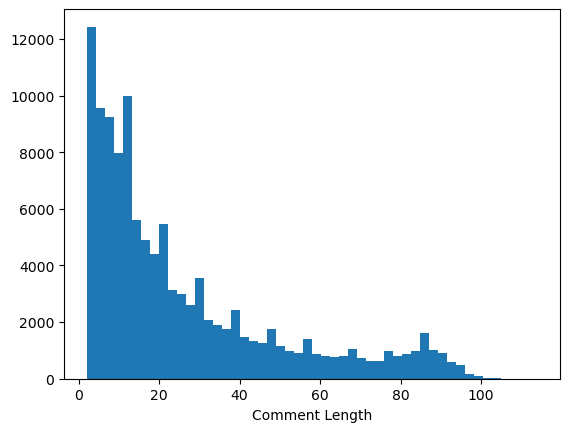

In [3]:
lengths = [len(c[0]) for c in ds_comments]
plt.xlabel('Comment Length')
plt.hist(lengths, bins=50)
plt.show()


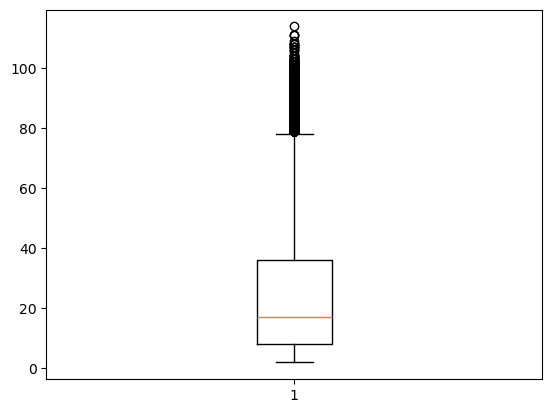

In [4]:
plt.boxplot(lengths)
plt.show()


In [18]:
ds_comments = [c for c in ds_comments if len(c[0]) in range(10, 120)]
len(ds_comments)


7661

In [19]:
# 保存处理后的数据
output_file = os.path.join(script_dir, "data/comments.pkl")
os.makedirs(os.path.dirname(output_file), exist_ok=True)
with open(output_file, 'wb') as outfile:
    import pickle
    pickle.dump(ds_comments, outfile)
    

In [20]:
# 加载处理后的数据
with open(output_file, 'rb') as infile:
    ds_comments = pickle.load(infile)
ds_comments[:3]

[([' ',
   '有人',
   '说',
   '挺',
   '《',
   '小',
   '时代',
   '》',
   '的',
   '人',
   '都',
   '将',
   '在',
   '电影史',
   '耻辱柱',
   '上',
   '有',
   '一席之地',
   '。',
   '那么',
   '给',
   '《',
   '大圣',
   '归来',
   '》',
   '的',
   '打',
   '一星',
   '的',
   '人',
   '也',
   '是',
   '如此',
   '！',
   '此片',
   '真',
   '称不上',
   '什么',
   '神作',
   '，',
   '但',
   '打',
   '一星',
   '的',
   '人',
   '心理',
   '够',
   '阴暗',
   '啊',
   '，',
   '天天',
   '喷',
   '国产片',
   '垃圾',
   '，',
   '出',
   '了',
   '一部',
   '质量',
   '尚可',
   '的',
   '却',
   '跑',
   '来',
   '打压',
   '，',
   '从',
   '垃圾',
   '跃进',
   '到',
   '好莱坞',
   '靠',
   '嘴',
   '喷',
   '即可',
   '？',
   '若',
   '喷',
   '最狠',
   '的',
   '人',
   '连票',
   '都',
   '没',
   '买',
   '，',
   '那',
   '我',
   '还',
   '真是',
   '没见',
   '过',
   '这么',
   '厚颜无耻',
   '的',
   '人',
   '了',
   '！'],
  1),
 ([' ',
   '京剧',
   '+',
   '摇滚',
   '+',
   '大话西游',
   '配乐',
   '，',
   '孙猴',
   '如何',
   '解印',
   '、',
   '老师傅',
   '咋',
   '来',
   '悬空寺',
   '是',
   '败笔',
   '，',


In [16]:
ds_comments[3:4]

[([' ',
   '实在',
   '不',
   '喜欢',
   '这种',
   '病毒',
   '式',
   '宣传',
   '方式',
   '，',
   '上映',
   '前',
   '一堆',
   '人',
   '在',
   '各大',
   '网站',
   '洗脑',
   '，',
   '电影',
   '怎么',
   '怎么',
   '好',
   '，',
   '哭成',
   '狗',
   '，',
   '官方',
   '没',
   '钱',
   '宣传',
   '好',
   '可怜',
   '，',
   '勾',
   '情怀',
   '...',
   '造成',
   'Herd',
   ' ',
   'effect',
   '，',
   '弄',
   '得',
   '人们',
   '无脑',
   '帮忙',
   '宣传',
   '。',
   '其实',
   '这',
   '电影',
   '就是',
   '剧情',
   '单调',
   '，',
   '画面',
   '一般',
   '，',
   '适合',
   '低龄',
   '，',
   '三星',
   '标杆',
   '。'],
  0)]

In [21]:
# 查看数据中的好评和差评的数量有多少
positive_count = sum(1 for comment, vote in ds_comments if vote == 1)
negative_count = sum(1 for comment, vote in ds_comments if vote == 0)
print(f"好评数量: {positive_count}")
print(f"差评数量: {negative_count}")

# 差评数占比
negative_ratio = negative_count / (positive_count + negative_count)
print(f"差评数占比: {negative_ratio:.2%}")

好评数量: 3882
差评数量: 3779
差评数占比: 49.33%
